In [93]:
# hyperlink for plots

def get_section_title(vartypes):
    return 'Plots: ' + ', '.join(vartype for vartype in vartypes)

def getHTML_hrefanchor(title):
    return ('''<a href="#{}">{}</a>'''
            .format('_'.join(title.split()),
                    string.capwords(title))
           )


title = get_section_title(vartypes)
display.display(display.HTML(getHTML_hrefanchor(title)))

In [97]:
# hyperlink for flux and cooling rate tables

def get_section_title(sum_over_g, vartype):
    whatgs = ('total over g-groups' 
              if sum_over_g else 'individual g-groups')
    return '{vartype}: {whatgs}'.format(vartype=vartype, whatgs=whatgs)


        
def getHTML_hrefanchor(title):
    return ('''<a href="#{}">{}</a>'''
            .format('_'.join(title.split()),
                    string.capwords(title))
           )


for sum_over_g, vartype in itertools.product(sum_over_gs, vartypes):
    title = get_section_title(sum_over_g, vartype)
    display.display(display.HTML(getHTML_hrefanchor(title)))

In [61]:
%matplotlib inline
import os
import sys
import itertools
import string

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

import climatools.plot.plot

from IPython import display

In [10]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu', 
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'n2o',
                       'band07_wn_1215_1380',
                       'P_50_T_250',
                       '4.e-21',
                       'midlatitude_summer')
                       
path_dgdgs = os.path.join(dir_run, 'dgdgs.dat')
path_absmean = os.path.join(dir_run, 'absmean.dat')
path_fluxg = os.path.join(dir_run, 'output_fluxg.dat')
path_coolrg = os.path.join(dir_run, 'output_coolrg.dat')
path_flux = os.path.join(dir_run, 'output_flux.dat')
path_coolr = os.path.join(dir_run, 'output_coolr.dat')
                       

In [11]:
dir_clirad = os.path.join('/nuwa_cluster/home/jackyu/radiation',
                          'clirad/LW/examples',
                          '1_0912_mdc_Steve_CLIRAD_lw',
                          'g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          '4.e-21',
                          'tmp')

path_fluxg_clirad = os.path.join(dir_clirad, 'output_fluxg.dat')
path_coolrg_clirad = os.path.join(dir_clirad, 'output_coolrg.dat')

In [12]:
# load fluxg
df = pd.read_csv(path_fluxg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'].isel(g=0))
ds_fluxg = ds

In [13]:
# load coolrg
df = pd.read_csv(path_coolrg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['layer'] = ('pressure', ds['layer'].isel(g=0))
ds_coolrg = ds

In [14]:
# load flux
df = pd.read_csv(path_flux, sep=r'\s+')
df = df.set_index(['pressure'])
ds = xr.Dataset.from_dataframe(df)
ds_flux = ds.set_coords(['level'])

In [15]:
# load coolr
df = pd.read_csv(path_coolr, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_coolr = ds.set_coords(['layer'])

In [16]:
# load absmean
df = pd.read_csv(path_absmean, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_absmean = ds.set_coords(['layer'])

In [17]:
# load dgdgs
df = pd.read_csv(path_dgdgs, sep=r'\s+')
df = df.set_index(['g'])

ds_dgdgs = xr.Dataset.from_dataframe(df)

In [18]:
# load clirad's fluxg
df = pd.read_csv(path_fluxg_clirad, sep=r'\s+')
df = df.set_index(['pressure', 'band', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'].isel(g=0, band=0))
ds_fluxg_clirad = ds
ds_fluxg_clirad = ds_fluxg_clirad.sel(band=7)
del ds_fluxg_clirad.coords['band']

In [19]:
# load clirad's coolrg
df = pd.read_csv(path_coolrg_clirad, sep=r'\s+')
df = df.set_index(['pressure', 'band', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['layer'] = ('pressure', ds['layer'].isel(g=0, band=0))
ds_coolrg_clirad = ds
ds_coolrg_clirad = ds_coolrg_clirad.sel(band=7)
del ds_coolrg_clirad.coords['band']

In [20]:
###
names_var = ['flug', 'fnetg', 'coolrg']
colors = ['darkred', 'lightcoral', 'blue']

dict_color = dict(zip(names_var, colors))

###
names_model = ['crd', 'clirad',]
linestyles = ['-', '--', '-.']

dict_linestyle = dict(zip(names_model, linestyles))

### 
yscales = ['linear', 'log']
varlims_from_indexrange = [(50, 1050), (1e-4, 50)]

dict_varlim = dict(zip(yscales, varlims_from_indexrange))

###
vartypes = ['flux', 'cooling rate']
names_allowedvar = [['flug', 'fnetg'], ['coolrg']]
dims_vertical = ['level', 'layer']
iverticals = [[0, 75], [0, 74]]

dict_names_allowedvar = dict(zip(vartypes, names_allowedvar))
dict_dims_vertical = dict(zip(vartypes, dims_vertical))
dict_iverticals = dict(zip(vartypes, iverticals))


### 
sum_over_gs = [False, True]


### what data have we?
vartypes = ['flux', 'cooling rate']
names_model = ['crd', 'clirad']
dss_flux = [ds_fluxg, ds_fluxg_clirad]
dss_cool = [ds_coolrg, ds_coolrg_clirad]
names_ds = list(itertools.product(vartypes, names_model))
dss = list(ds 
           for ds in itertools.chain(dss_flux, dss_cool)
           if ds)
dict_ds = dict(zip(names_ds, dss))


### what to plot in each axis
names_ax = list(itertools.product(vartypes, yscales))



## Plots: Flux, Cooling Rate


-----  g-group 1  ---------------


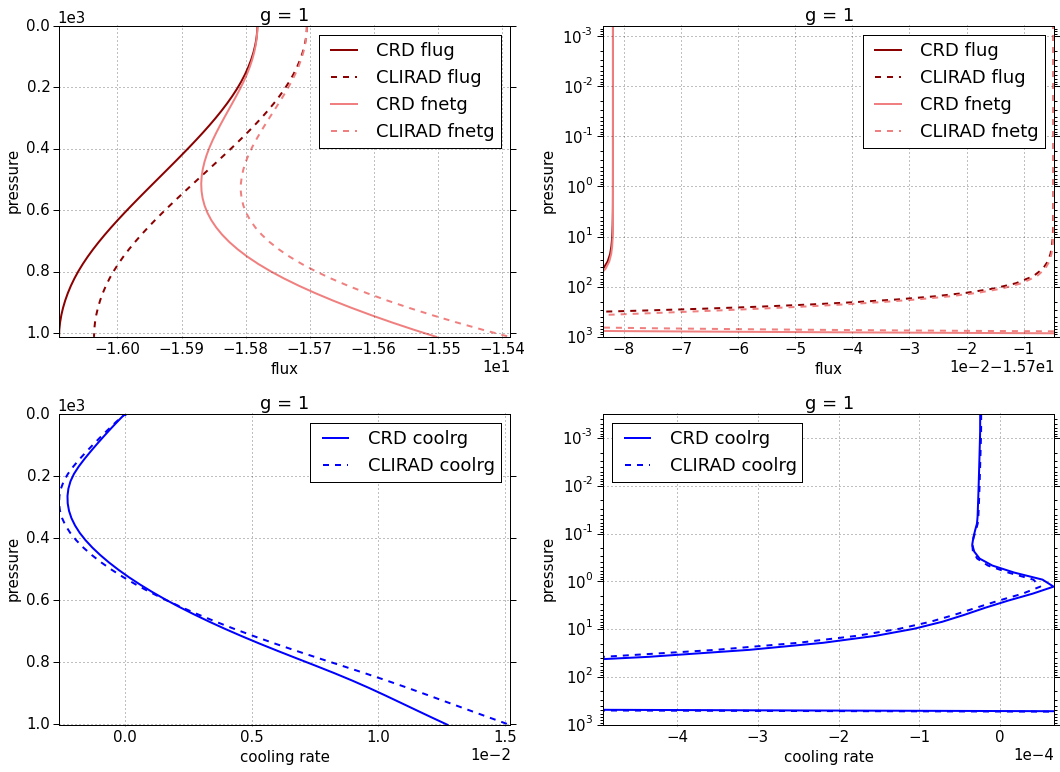


-----  g-group 2  ---------------


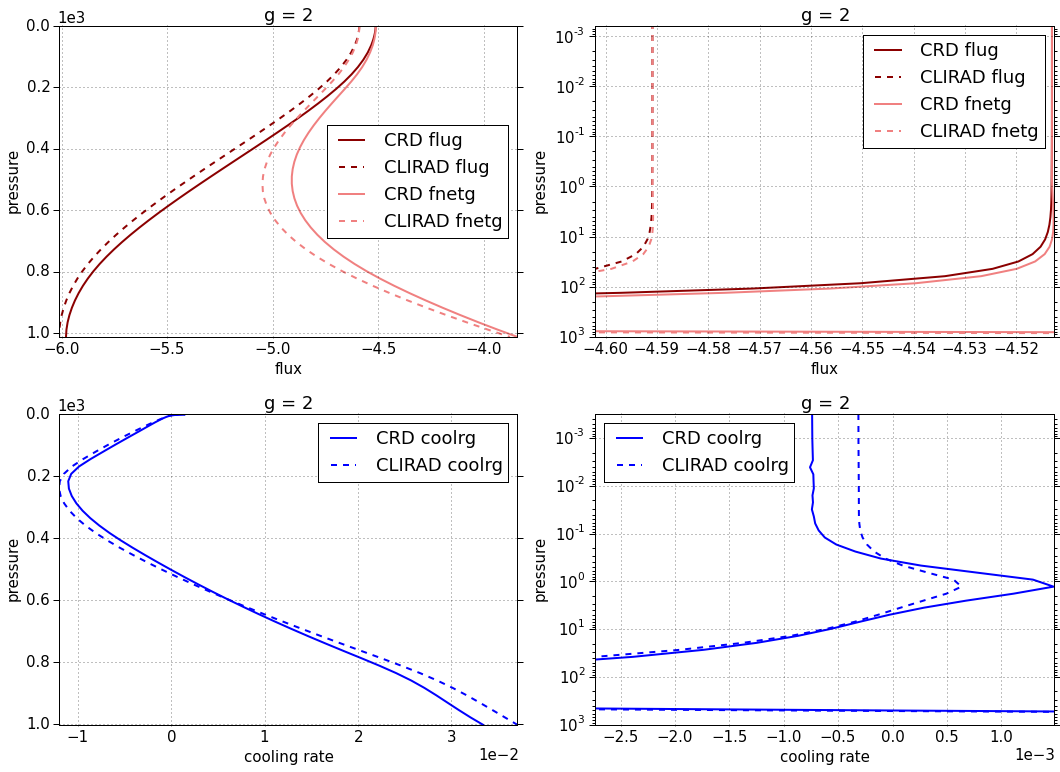


-----  g-group 3  ---------------


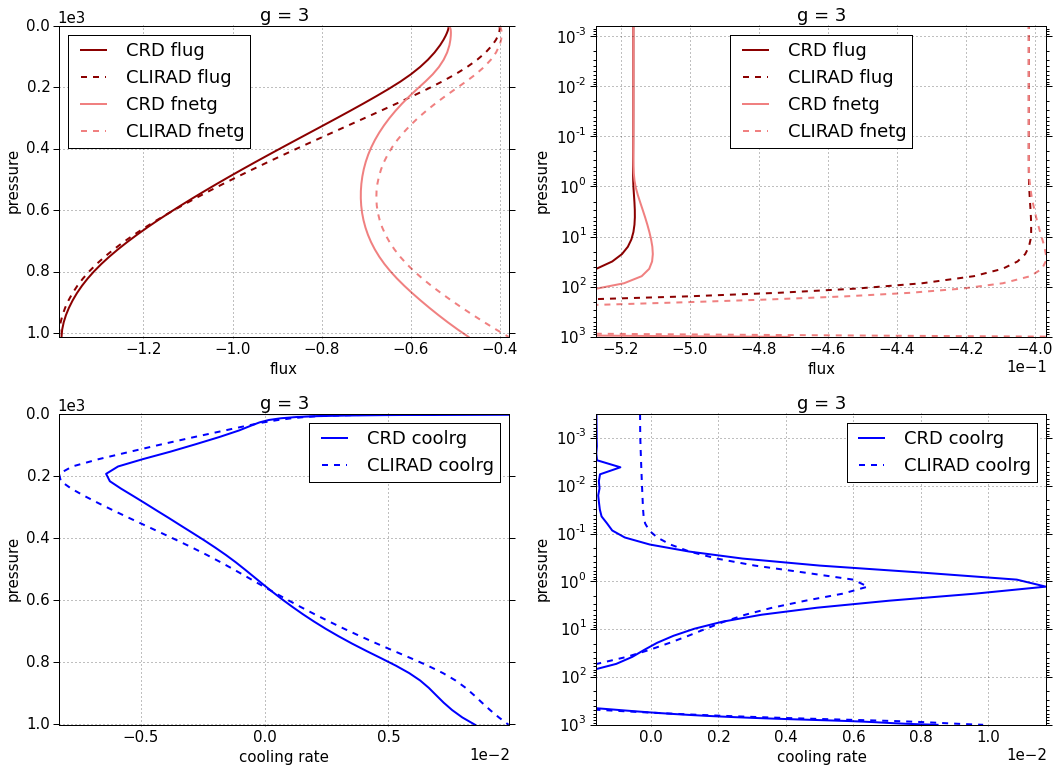


-----  g-group 4  ---------------


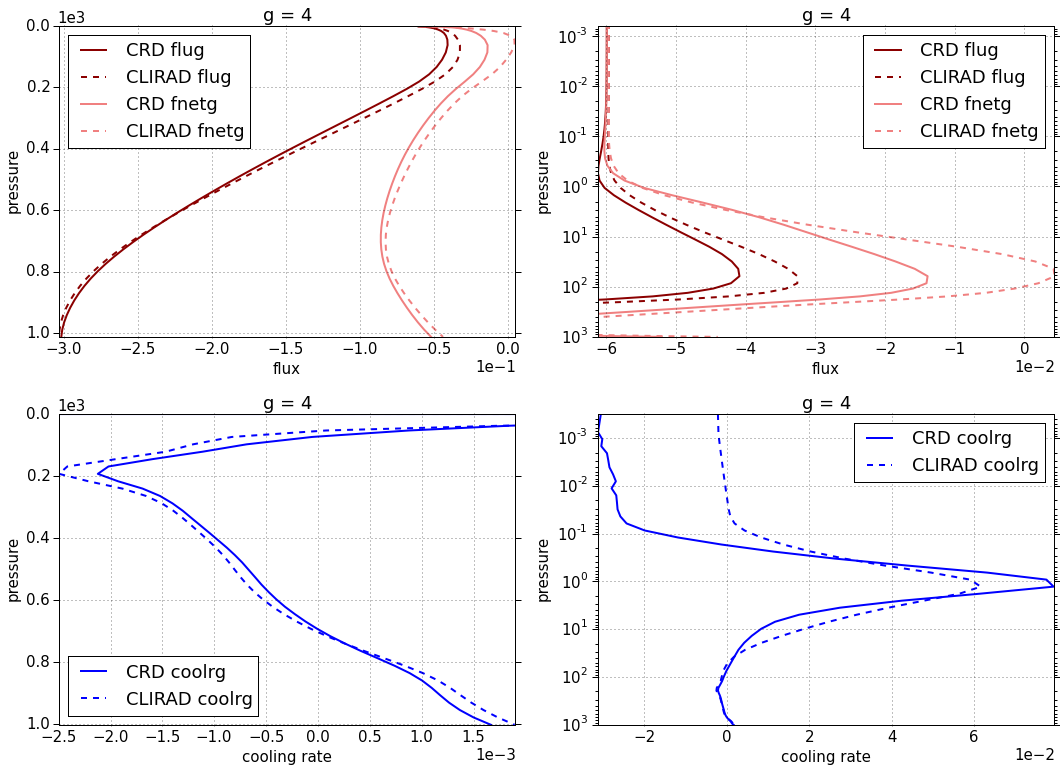

In [91]:
def get_section_title(vartypes):
    return 'Plots: ' + ', '.join(vartype for vartype in vartypes)

def getHTML_idanchor(title):
    return '''<a id="{}"></a>'''.format('_'.join(title.split()))

def getMarkdown_section(title):
    return '## ' + string.capwords(title)

title = get_section_title(vartypes)
display.display(display.HTML(getHTML_idanchor(title)))
display.display(display.Markdown(getMarkdown_section(title)))


matplotlib.rcParams.update({'font.size': 15,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 


for g in [1, 2, 3, 4]:
    
    print()
    print(5 * '-' + '  g-group {}  '.format(g) + 15 * '-')
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
    axs = axs.flatten()

    for ax, (vartype, yscale) in zip(axs, names_ax):
        for name_var in dict_names_allowedvar[vartype]:
            for model in names_model:
                ds = dict_ds[(vartype, model)]
                ds[name_var].sel(g=g)\
                .climaviz\
                .plot(ax=ax, 
                      linewidth=2, grid=True,
                      label=model.upper() + ' ' + name_var,
                      color=dict_color[name_var],
                      linestyle=dict_linestyle[model],
                      index_on_yaxis=True, 
                      yincrease=False, yscale=yscale,
                      varlim_from_indexrange=dict_varlim[yscale])
            
                ax.set_xlabel(vartype)
            
    plt.tight_layout()
    display.display(plt.gcf())
    plt.close()

In [77]:
def get_pres_benchmark(vartype='flux', model_benchmark='crd',
                            ipressures=[0, 75]):
    return dict_ds[(vartype, model_benchmark)]\
           .coords['pressure']\
           .isel(pressure=ipressures)
        
        
        
def summarytable(vartype='flux', model='crd', sum_over_g=False,
                 pressures=None):
    if list(pressures) == None:
        ds = dict_ds[(vartype, model)]
    else:
        ds = dict_ds[(vartype, model)]\
             .sel(pressure=pressures, method='nearest')
    
    if sum_over_g:
        ds = ds.sum('g')
    
    df = ds.to_dataframe()
    df = df.set_index([dict_dims_vertical[vartype]], append=True)
    return df




def print_diff_benchmark(dict_df, 
                         benchmark='crd', 
                         title='Untitled'):
        
    print(title)
    
    othercases = [case for case in dict_df.keys()]
    othercases.remove(benchmark)   
    
    df_bench = dict_df[benchmark]
    
    print()
    print(benchmark.upper())
    display.display(df_bench)
    
    for case in othercases:
        print()
        print(case.upper())
        display.display(dict_df[case])

    for case in othercases:
        df_case = dict_df[case]

        print()
        print('{} - {}'.format(case.upper(), benchmark.upper()))
        if not all(df_case.index == df_bench.index):
            print('Case indices not identical to benchmark indices. '
                  "Force case indices to be the same as benchmark's")
            df_case.index = df_bench.index
        display.display(df_case - df_bench)
        

        


In [95]:
def get_section_title(sum_over_g, vartype):
    whatgs = ('total over g-groups' 
              if sum_over_g else 'individual g-groups')
    return '{vartype}: {whatgs}'.format(vartype=vartype, whatgs=whatgs)

        
def getHTML_idanchor(title):
    return '''<a id="{}"></a>'''.format('_'.join(title.split()))


def getMarkdown_section(title):
    return '## ' + string.capwords(title)
    


benchmark = 'crd'

for sum_over_g in sum_over_gs:
    print(2*'\n')
    for vartype in vartypes:
        print(2*'\n')
        
        title = get_section_title(sum_over_g=sum_over_g,
                                  vartype=vartype)
        display.display(display.HTML(getHTML_idanchor(title)))
        display.display(display.Markdown(getMarkdown_section(title)))
        
        pres_benchmark = get_pres_benchmark(vartype=vartype,
                                            model_benchmark=benchmark,
                                            ipressures=dict_iverticals[vartype])
        dict_tables = {model: summarytable(vartype=vartype,
                                           model=model,
                                           sum_over_g=sum_over_g,
                                           pressures=pres_benchmark)
                       for model in names_model}
        print_diff_benchmark(dict_tables, 
                             benchmark='crd',
                             title='')

## Flux: Individual G-groups



CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.781963  0.000000 -15.781963
  1013     76    -16.090938  0.588028 -15.502910
2 0        1      -4.513059  0.000000  -4.513059
  1013     76     -5.979005  2.136721  -3.842284
3 0        1      -0.516288  0.000000  -0.516288
  1013     76     -1.383483  0.912395  -0.471088
4 0        1      -0.059940  0.000000  -0.059940
  1013     76     -0.301745  0.249674  -0.052071


CLIRAD


flug          fldg      fnetg
g pressure level                                    
1 0        1     -15.704752  2.672792e-13 -15.704752
  1013     76    -16.036479  6.475093e-01 -15.388969
2 0        1      -4.590877  4.912106e-12  -4.590877
  1013     76     -6.011898  2.134107e+00  -3.877790
3 0        1      -0.401811  2.367501e-11  -0.401811
  1013     76     -1.388980  1.007774e+00  -0.381206
4 0        1      -0.059677  5.419841e-10  -0.059677
  1013     76     -0.303245  2.592302e-01  -0.044015


CLIRAD - CRD


flug          fldg     fnetg
g pressure level                                  
1 0        1      0.077211  2.672792e-13  0.077211
  1013     76     0.054459  5.948160e-02  0.113941
2 0        1     -0.077817  4.912106e-12 -0.077817
  1013     76    -0.032892 -2.613900e-03 -0.035506
3 0        1      0.114476  2.367501e-11  0.114476
  1013     76    -0.005498  9.537980e-02  0.089882
4 0        1      0.000263  5.419841e-10  0.000263
  1013     76    -0.001500  9.555900e-03  0.008056

## Cooling Rate: Individual G-groups



CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.012721
2 0.000312    1     -0.000740
  1001.112500 75     0.033380
3 0.000312    1     -0.001619
  1001.112500 75     0.008495
4 0.000312    1     -0.030518
  1001.112500 75     0.001665


CLIRAD


coolrg
g pressure    layer          
1 0.000312    1     -0.000023
  1001.112500 75     0.015165
2 0.000312    1     -0.000314
  1001.112500 75     0.037056
3 0.000312    1     -0.000325
  1001.112500 75     0.009847
4 0.000312    1     -0.002134
  1001.112500 75     0.001894


CLIRAD - CRD
Case indices not identical to benchmark indices. Force case indices to be the same as benchmark's


coolrg
g pressure    layer          
1 0.000312    1      0.000001
  1001.112500 75     0.002445
2 0.000312    1      0.000426
  1001.112500 75     0.003676
3 0.000312    1      0.001294
  1001.112500 75     0.001352
4 0.000312    1      0.028384
  1001.112500 75     0.000229

## Flux: Total Over G-groups



CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871251,0.000000,-20.871251
1013,76,-23.755171,3.886818,-19.868353



CLIRAD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.757118,5.708385e-10,-20.757118
1013,76,-23.740602,4.048621e+00,-19.691980



CLIRAD - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,0.114133,5.708385e-10,0.114133
1013,76,0.014569,1.618034e-01,0.176372


## Cooling Rate: Total Over G-groups



CRD


,,coolrg
pressure,layer,
0.000312,1,-0.032901
1001.112500,75,0.056261



CLIRAD


,,coolrg
pressure,layer,
0.000312,1,-0.002796
1001.112500,75,0.063962



CLIRAD - CRD
Case indices not identical to benchmark indices. Force case indices to be the same as benchmark's


,,coolrg
pressure,layer,
0.000312,1,0.030104
1001.112500,75,0.007702


In [98]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')